In [1]:
import pandas as pd
import numpy as np

In [2]:
Data = pd.read_csv("./expanded (1).csv")

In [3]:
Data.head()

,hospital_id,date,num_modules,num_functional_modules,num_tests,cartridges_used,max_tests_per_machine
0,1,15 04 2023,4,5,9,9,35
1,1,16 04 2023,4,4,5,5,28
2,2,10 10 2018,4,4,6,6,28
3,2,1 09 2021,4,4,5,5,28
4,2,4 09 2021,4,3,3,3,21


In [4]:
for column in Data:
    print(Data[column].dtype)

int64
object
int64
int64
int64
int64
int64


In [6]:
Data['date'] = pd.to_datetime(Data['date'], infer_datetime_format=True)

In [7]:
for column in Data:
    print(Data[column].dtype)

int64
datetime64[ns]
int64
int64
int64
int64
int64


In [9]:
Data['year'] = Data['date'].dt.year
Data['month'] = Data['date'].dt.month
Data['day'] = Data['date'].dt.day

In [10]:
Data.head()

,hospital_id,date,num_modules,num_functional_modules,num_tests,cartridges_used,max_tests_per_machine,year,month,day
0,1,2023-04-15,4,5,9,9,35,2023,4,15
1,1,2023-04-16,4,4,5,5,28,2023,4,16
2,2,2018-10-10,4,4,6,6,28,2018,10,10
3,2,2021-01-09,4,4,5,5,28,2021,1,9
4,2,2021-04-09,4,3,3,3,21,2021,4,9


In [12]:
columns = [column for column in Data if(column != "date")]

In [13]:
newData = Data[columns]

In [14]:
newData.head()

,hospital_id,num_modules,num_functional_modules,num_tests,cartridges_used,max_tests_per_machine,year,month,day
0,1,4,5,9,9,35,2023,4,15
1,1,4,4,5,5,28,2023,4,16
2,2,4,4,6,6,28,2018,10,10
3,2,4,4,5,5,28,2021,1,9
4,2,4,3,3,3,21,2021,4,9


In [15]:
corr = newData.corr()

In [16]:
import seaborn as sns

<AxesSubplot:>

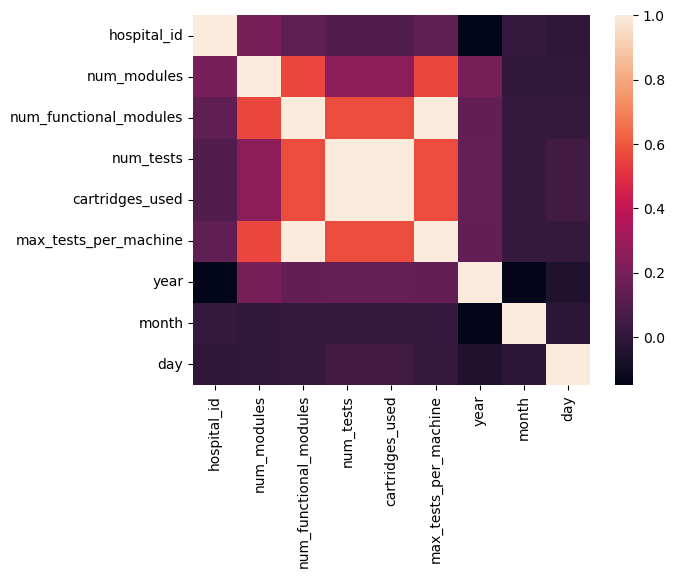

In [17]:
sns.heatmap(corr)

array([[<AxesSubplot:title={'center':'hospital_id'}>,
        <AxesSubplot:title={'center':'num_modules'}>,
        <AxesSubplot:title={'center':'num_functional_modules'}>],
       [<AxesSubplot:title={'center':'num_tests'}>,
        <AxesSubplot:title={'center':'cartridges_used'}>,
        <AxesSubplot:title={'center':'max_tests_per_machine'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>]], dtype=object)

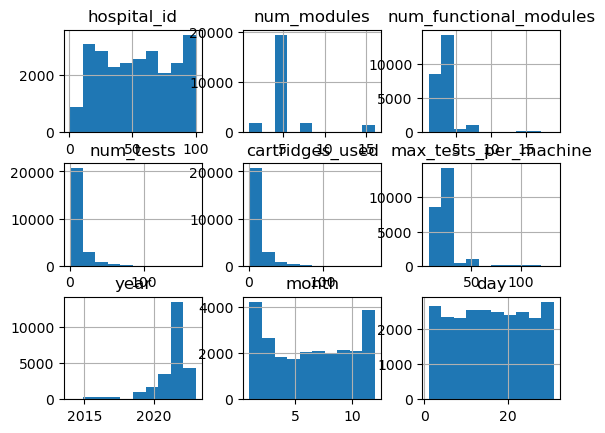

In [18]:
newData.hist()

In [19]:
#check for nulls

for column in newData:
    print(column, newData[column].isnull().sum() / len(newData) * 100)

hospital_id 0.0
num_modules 0.0
num_functional_modules 0.0
num_tests 0.0
cartridges_used 0.0
max_tests_per_machine 0.0
year 0.0
month 0.0
day 0.0


In [20]:
from sklearn.model_selection import train_test_split

In [24]:
yData = newData['max_tests_per_machine']
newData = newData[[column for column in newData if (column != "max_tests_per_machine")]]

In [25]:
yData

0        35
1        28
2        28
3        28
4        21
         ..
24769    28
24770    28
24771    28
24772    28
24773    28
Name: max_tests_per_machine, Length: 24774, dtype: int64

In [26]:
newData.head()

,hospital_id,num_modules,num_functional_modules,num_tests,cartridges_used,year,month,day
0,1,4,5,9,9,2023,4,15
1,1,4,4,5,5,2023,4,16
2,2,4,4,6,6,2018,10,10
3,2,4,4,5,5,2021,1,9
4,2,4,3,3,3,2021,4,9


In [35]:
Xtrain,Xtest,ytrain,ytest= train_test_split(newData, yData, shuffle=True)

In [36]:
Xtrain.shape, ytrain.shape

((18580, 8), (18580,))

In [37]:
Xtest.shape,ytest.shape

((6194, 8), (6194,))

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(Xtrain, ytrain)

LinearRegression()

In [41]:
lr.score(Xtrain, ytrain)

1.0

In [42]:
lr.score(Xtest, ytest)

1.0

In [44]:
predicted_test = lr.predict(Xtest)

In [46]:
predicted_test

array([ 7., 28., 28., ..., 21.,  7., 21.])

In [47]:
import matplotlib.pyplot as plt

In [53]:
display_df = pd.DataFrame()

In [57]:
display_df['year'] = Xtest['year']
display_df['month'] = Xtest['month']
display_df['predicted test'] = predicted_test
display_df['actual test'] = ytest

Text(0.5, 1.0, 'Actual test vs year')

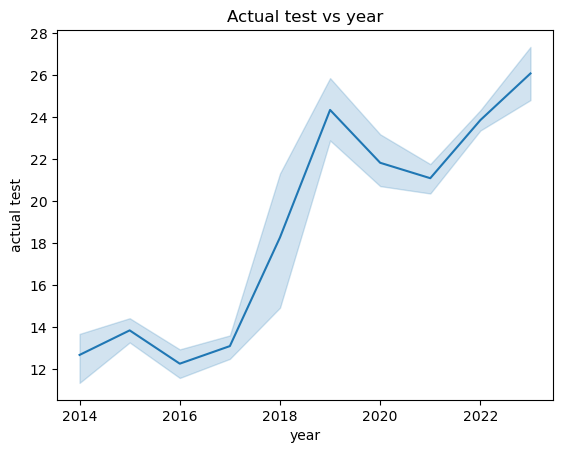

In [61]:

sns.lineplot( data = display_df ,x="year", y="actual test")
plt.title("Actual test vs year")

Text(0.5, 1.0, 'predicted test vs year')

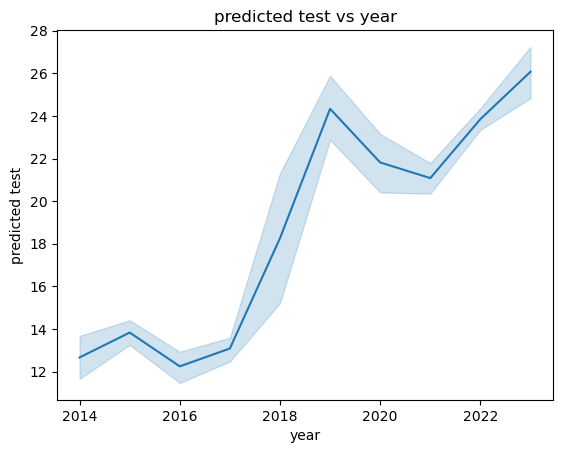

In [62]:
sns.lineplot( data = display_df ,x="year", y="predicted test")
plt.title("predicted test vs year")

In [63]:
sample_forecast = [3,4,8,19,8,2024,5,15]

In [64]:
lr.predict([sample_forecast])

C:\Users\dex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([56.])